<a href="https://colab.research.google.com/github/edogriba/NAML-2024/blob/main/NAMLEXS00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None).to_numpy()


In [3]:
A = data[:, :4].T.astype(np.float64)
labels = data[:, 4]
groups = ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica')


In [5]:
A.shape

(4, 150)

There are 150 samples in the dataset

In [21]:
print(f"There are {labels[labels == 'Iris-setosa'].shape[0]} samples of type setosa")
print(f"There are {labels[labels == 'Iris-virginica'].shape[0]} samples of type virginica")
print(f"There are {labels[labels == 'Iris-versicolor'].shape[0]} samples of type versicolor")

There are 50 of type setosa
There are 50 of type virginica
There are 50 of type versicolor


<Figure size 640x480 with 0 Axes>

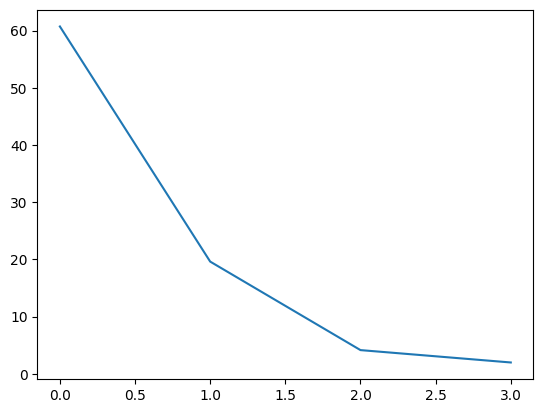

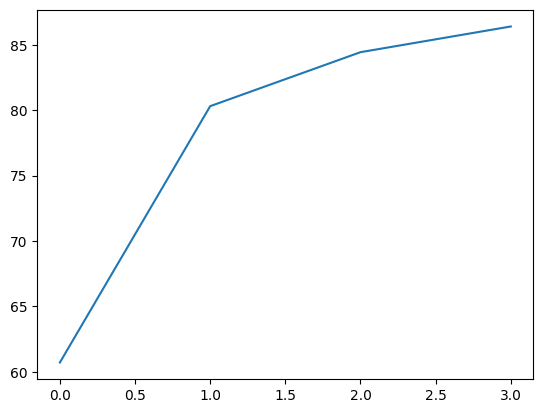

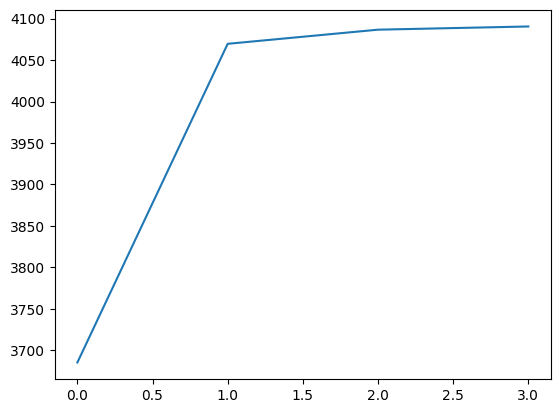

<Figure size 640x480 with 0 Axes>

In [34]:
A = A - np.mean(A) / np.std(A)

U, s, VT = np.linalg.svd(A)
S = np.diag(s)
x = np.arange(0, len(s))


plt.plot(x, s)
plt.figure()
plt.plot(x, np.cumsum(s))
plt.figure()
plt.plot(x, np.cumsum(s**2))
plt.figure()

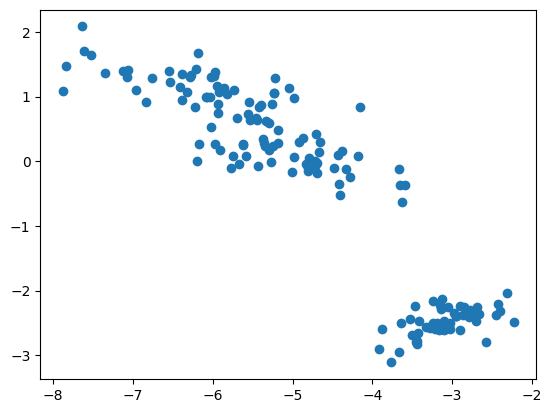

In [35]:
Phi = U.T @ A

plt.scatter(Phi[0, :], Phi[1, :])

We can see that there are two big clusters

# Exercise 2

The Gradient Descent is too heavy too be computed because when whe would compute the loss function we would too much computations and therefore just compute the loss functions on some random trainning data therefore making it lighter but of course less precise.


In [82]:
import numpy as np
import jax
import jax.numpy as jnp

m = 100
noise = 1.0
coeff_exact = np.array([5.0, 1.0])

np.random.seed(0)
X = np.c_[[1]*100, 13.5 * np.random.rand(m, 1)]
y = X @ coeff_exact + noise * np.random.randn(m)
# x = np.arange(len(y))
x = X[:, 1]

In [84]:
print(X.shape, coeff_exact.shape)


(100, 2) (2,)


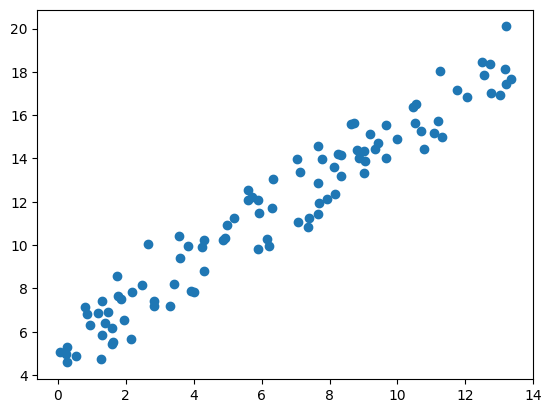

In [83]:
plt.scatter(x, y)

In [85]:
# Split into training and validation sets
train_size = int(0.8 * m)
val_size = m - train_size

# Shuffling the indices for a randomized split

key = jax.random.PRNGKey(0)
key, subkey = jax.random.split(key)
indices = jax.random.permutation(subkey, m)
train_indices = indices[:train_size]
val_indices = indices[train_size:]

# Creating training and validation sets
x_train, y_train = x[train_indices], y[train_indices]
x_val, y_val = x[val_indices], y[val_indices]

In [86]:
def model(theta, x):
  return theta[0] + theta[1] * x

In [97]:
def mse_loss(theta, x, y):
  y_pred = model(theta, x)
  return jnp.mean((y-y_pred)**2)


grad_mse_loss = jax.jit(jax.grad(mse_loss))


In [106]:
def sgd_update(theta, x_batch, y_batch, lr):
  grads = grad_mse_loss(theta, x_batch, y_batch)
  return theta - lr * grads


def stochastic_gradient_descent(
    theta,
    training_input,
    training_labels,
    validation_input,
    validation_labels,
    learning_rate=0.01,
    epochs=2000,
    batch_size=10,
    state=0,
):
    key = jax.random.PRNGKey(state)
    # Iterate over the number of epochs
    for epoch in range(epochs):
        # Shuffle data indices using JAX's random key
        key, subkey = jax.random.split(key)
        perm = jax.random.permutation(subkey, len(training_input))
        # Process data in mini-batches
        for i in range(0, len(training_input), batch_size):
            batch_idx = perm[i : i + batch_size]
            x_batch = training_input[batch_idx]
            y_batch = training_labels[batch_idx]
            # Perform SGD update
            theta = sgd_update(theta, x_batch, y_batch, learning_rate)
        # Print the loss every 10 epochs
        if epoch % 10 == 0:
            loss = mse_loss(theta, validation_input, validation_labels)
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    return theta


    key = jax.random.PRNGKey(state)
    for epoch in range(epochs):
        key, subkey = jax.random.split(key)
        perm = jax.random.permutation(subkey, len(training_input))
        for i in range(0, len(training_input), batch_size):
            batch_idx = perm[i : i + batch_size]
            x_batch = training_input[batch_idx]
            y_batch = training_labels[batch_idx]
            theta = sgd_update(theta, x_batch, y_batch, learning_rate)
        if epoch % 10 == 0:
            loss = X_loss(theta, validation_input, validation_labels)
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    return theta


In [113]:
# Run the Stochastic Gradient Descent
theta = jnp.array(np.random.randn(2))  # Initial guess for theta_0 (intercept) and theta_1 (slope)
theta_opt = stochastic_gradient_descent(
    theta, x_train, y_train, x_val, y_val, learning_rate=0.0075, epochs=100, batch_size=10
)
print(
    f"Optimized parameters: theta_0 = {theta_opt[0]:.2f}, theta_1 = {theta_opt[1]:.2f}"
)



Epoch 0, Loss: 3.4928
Epoch 10, Loss: 2.4903
Epoch 20, Loss: 1.8823
Epoch 30, Loss: 1.6430
Epoch 40, Loss: 1.5161
Epoch 50, Loss: 1.5473
Epoch 60, Loss: 1.4184
Epoch 70, Loss: 1.4577
Epoch 80, Loss: 1.4354
Epoch 90, Loss: 1.3972
Optimized parameters: theta_0 = 5.11, theta_1 = 0.97


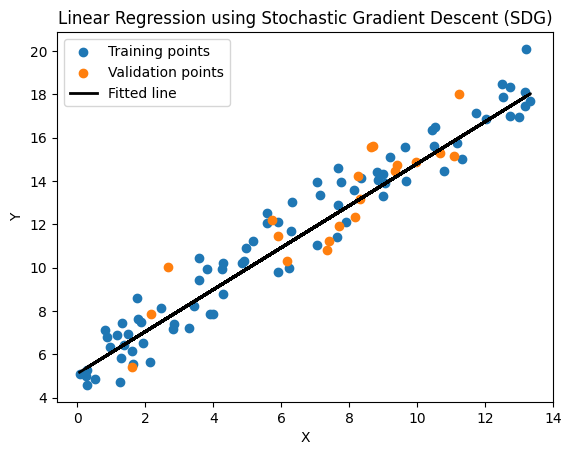

In [115]:
# After the training loop, use the optimized parameters to plot the regression line
# Generate predictions using the optimized parameters
y_pred = model(theta_opt, x)

# Plot the original data points
plt.scatter(x_train, y_train, label="Training points")
plt.scatter(x_val, y_val, label="Validation points")

# Plot the regression line
plt.plot(x, y_pred, label="Fitted line", color="black", linewidth=2)

# Add labels and a legend
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression using Stochastic Gradient Descent (SDG)")
plt.legend()
plt.show()